In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
df = pd.read_csv('C:/programming projects/data analyst/portafolio/dataframes/traffic_accidents.csv', sep=',')

In [3]:
# check data
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [4]:
# check null values
null_counts = df.isnull().sum()
null_counts

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [5]:
# check data types
df.dtypes

crash_date                        object
traffic_control_device            object
weather_condition                 object
lighting_condition                object
first_crash_type                  object
trafficway_type                   object
alignment                         object
roadway_surface_cond              object
road_defect                       object
crash_type                        object
intersection_related_i            object
damage                            object
prim_contributory_cause           object
num_units                          int64
most_severe_injury                object
injuries_total                   float64
injuries_fatal                   float64
injuries_incapacitating          float64
injuries_non_incapacitating      float64
injuries_reported_not_evident    float64
injuries_no_indication           float64
crash_hour                         int64
crash_day_of_week                  int64
crash_month                        int64
dtype: object

In [6]:
# count unknown values
unknown_counts = df.apply(lambda x: x[x == 'UNKNOWN'].count())
unknown_counts

crash_date                           0
traffic_control_device            4455
weather_condition                 6534
lighting_condition                4336
first_crash_type                     0
trafficway_type                   1060
alignment                            0
roadway_surface_cond             12509
road_defect                      34426
crash_type                           0
intersection_related_i               0
damage                               0
prim_contributory_cause              0
num_units                            0
most_severe_injury                   0
injuries_total                       0
injuries_fatal                       0
injuries_incapacitating              0
injuries_non_incapacitating          0
injuries_reported_not_evident        0
injuries_no_indication               0
crash_hour                           0
crash_day_of_week                    0
crash_month                          0
dtype: int64

In [7]:
# group by month and count the number of accidents
df['crash_date'] = pd.to_datetime(df['crash_date'], format='%m/%d/%Y %I:%M:%S %p')
accidents_by_month = df.groupby(df['crash_date'].dt.to_period('M')).size().sort_index(ascending=False)
accidents_by_month.head(10)

crash_date
2025-01    1036
2024-12    2169
2024-11    2184
2024-10    2379
2024-09    2355
2024-08    2282
2024-07    2229
2024-06    2299
2024-05    2418
2024-04    2101
Freq: M, dtype: int64

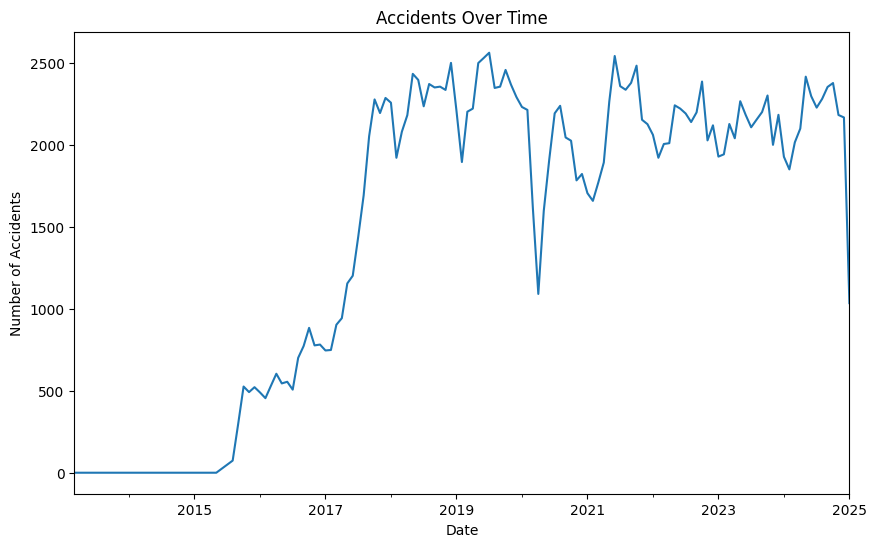

In [8]:
# graph the number of accidents over time
accidents_by_month.plot(kind='line', figsize=(10, 6), title='Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()

# It shows the amount of accidents that occurred over time, grouped per month.
# It allows observing trends and temporary patterns in accidents.

In [9]:
# group by crash type and count the number of accidents
crash_type_counts = df['first_crash_type'].value_counts().sort_values(ascending=True)
crash_type_counts

first_crash_type
TRAIN                               8
REAR TO REAR                       49
ANIMAL                             77
OVERTURNED                         96
OTHER NONCOLLISION                249
OTHER OBJECT                      759
REAR TO SIDE                      773
REAR TO FRONT                    1157
HEAD ON                          1790
SIDESWIPE OPPOSITE DIRECTION     1839
FIXED OBJECT                     4742
PARKED MOTOR VEHICLE             4893
PEDALCYCLIST                     5337
PEDESTRIAN                       8996
SIDESWIPE SAME DIRECTION        20116
REAR END                        42018
ANGLE                           52250
TURNING                         64157
Name: count, dtype: int64

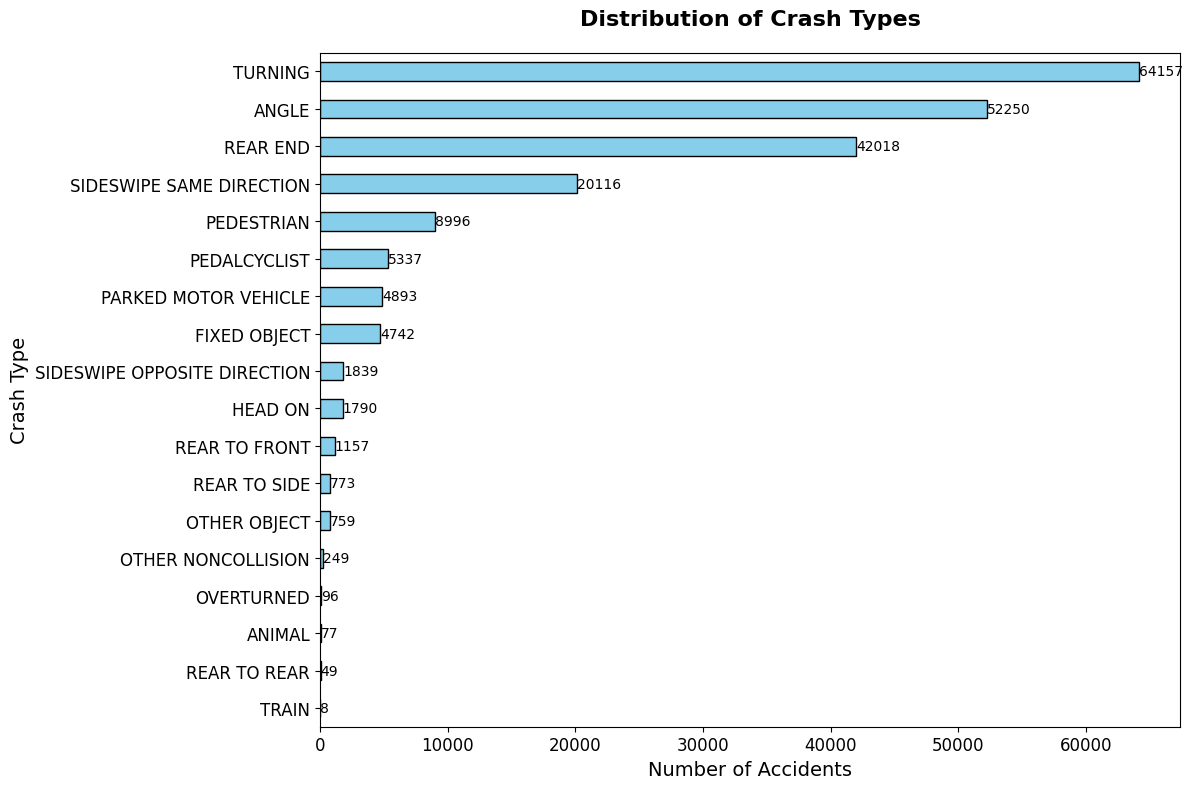

In [10]:
# Plotting the distribution of crash types
crash_type_counts.plot(
    kind='barh', 
    figsize=(12, 8), 
    title='Distribution of Crash Types', 
    color='skyblue',  
    edgecolor='black'
)

# Add labels to the plot
plt.title('Distribution of Crash Types', fontsize=16, weight='bold', pad=20)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Crash Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a vertical line to the plot for the average number of accidents
for index, value in enumerate(crash_type_counts):
    plt.text(value + 5, index, str(value), fontsize=10, va='center')

plt.tight_layout()

plt.show()

# It shows the distribution of different types of accidents. 
# It allows to identify what are the most common types of accidents.

In [11]:
# group by weather condition and count the number of accidents
weather_vs_crash = df.groupby(['weather_condition', 'first_crash_type']).size().unstack()
weather_vs_crash = weather_vs_crash.fillna(0.0)
weather_vs_crash

first_crash_type,ANGLE,ANIMAL,FIXED OBJECT,HEAD ON,OTHER NONCOLLISION,OTHER OBJECT,OVERTURNED,PARKED MOTOR VEHICLE,PEDALCYCLIST,PEDESTRIAN,REAR END,REAR TO FRONT,REAR TO REAR,REAR TO SIDE,SIDESWIPE OPPOSITE DIRECTION,SIDESWIPE SAME DIRECTION,TRAIN,TURNING
weather_condition,,,,,,,,,,,,,,,,,,
"BLOWING SAND, SOIL, DIRT",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BLOWING SNOW,43.0,0.0,9.0,1.0,0.0,0.0,0.0,3.0,0.0,9.0,15.0,0.0,0.0,0.0,2.0,8.0,0.0,37.0
CLEAR,41013.0,68.0,3420.0,1391.0,194.0,589.0,78.0,3704.0,4615.0,6627.0,32319.0,921.0,32.0,614.0,1416.0,16455.0,8.0,51236.0
CLOUDY/OVERCAST,1970.0,4.0,163.0,37.0,9.0,23.0,1.0,157.0,161.0,301.0,1495.0,48.0,3.0,18.0,69.0,708.0,0.0,2366.0
FOG/SMOKE/HAZE,105.0,0.0,10.0,6.0,0.0,2.0,0.0,12.0,10.0,24.0,59.0,4.0,0.0,1.0,1.0,29.0,0.0,97.0
FREEZING RAIN/DRIZZLE,127.0,0.0,31.0,3.0,0.0,2.0,1.0,17.0,6.0,43.0,88.0,2.0,0.0,2.0,7.0,25.0,0.0,156.0
OTHER,178.0,0.0,29.0,4.0,2.0,3.0,2.0,19.0,9.0,25.0,130.0,1.0,0.0,2.0,2.0,37.0,0.0,184.0
RAIN,5705.0,3.0,653.0,214.0,29.0,75.0,10.0,402.0,361.0,1364.0,4409.0,84.0,4.0,81.0,202.0,1563.0,0.0,6544.0
SEVERE CROSS WIND GATE,8.0,0.0,1.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,6.0,0.0,0.0,0.0,2.0,3.0,0.0,3.0


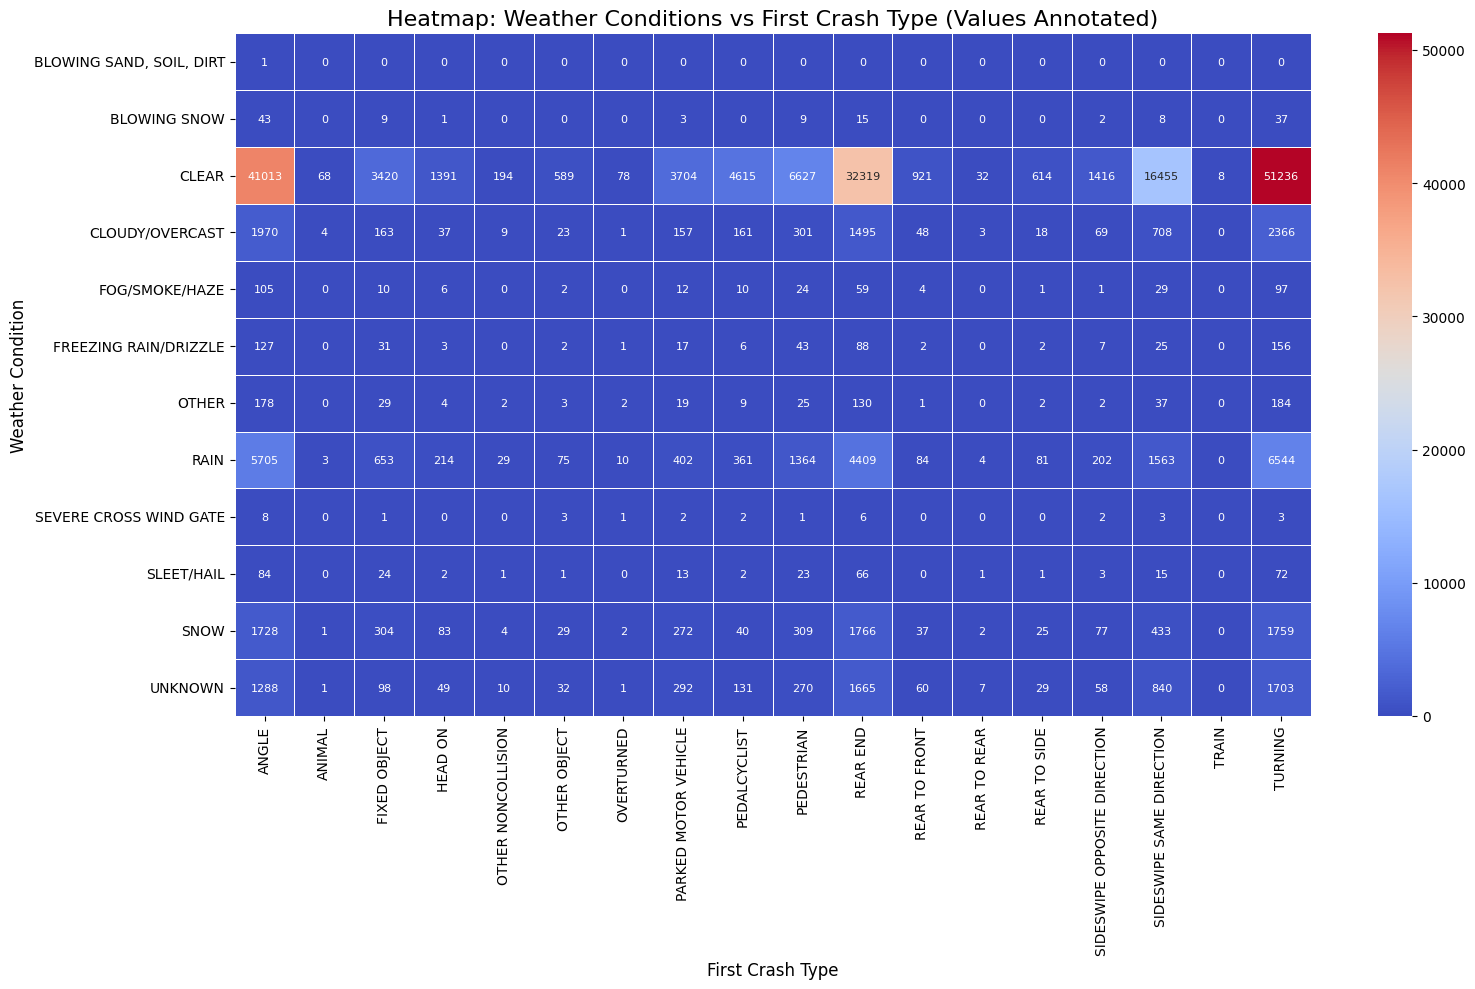

In [12]:
# Configure the plot size for better visibility
plt.figure(figsize=(16, 10))

# Create a heatmap with annotations
sns.heatmap(weather_vs_crash, annot=True, fmt=".0f", cmap="coolwarm", cbar=True, linewidths=0.5, annot_kws={"size": 8})

# Set title and labels
plt.title("Heatmap: Weather Conditions vs First Crash Type (Values Annotated)", fontsize=16)
plt.xlabel("First Crash Type", fontsize=12)
plt.ylabel("Weather Condition", fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()

# It shows a heat matrix that relates climatic conditions to the type of accident. 
# It allows to identify how climatic conditions affect the types of accidents.

In [13]:
# group by severity and count the number of accidents
severity_counts = df['most_severe_injury'].value_counts()
severity_counts

most_severe_injury
NO INDICATION OF INJURY     154789
NONINCAPACITATING INJURY     31527
REPORTED, NOT EVIDENT        16075
INCAPACITATING INJURY         6564
FATAL                          351
Name: count, dtype: int64

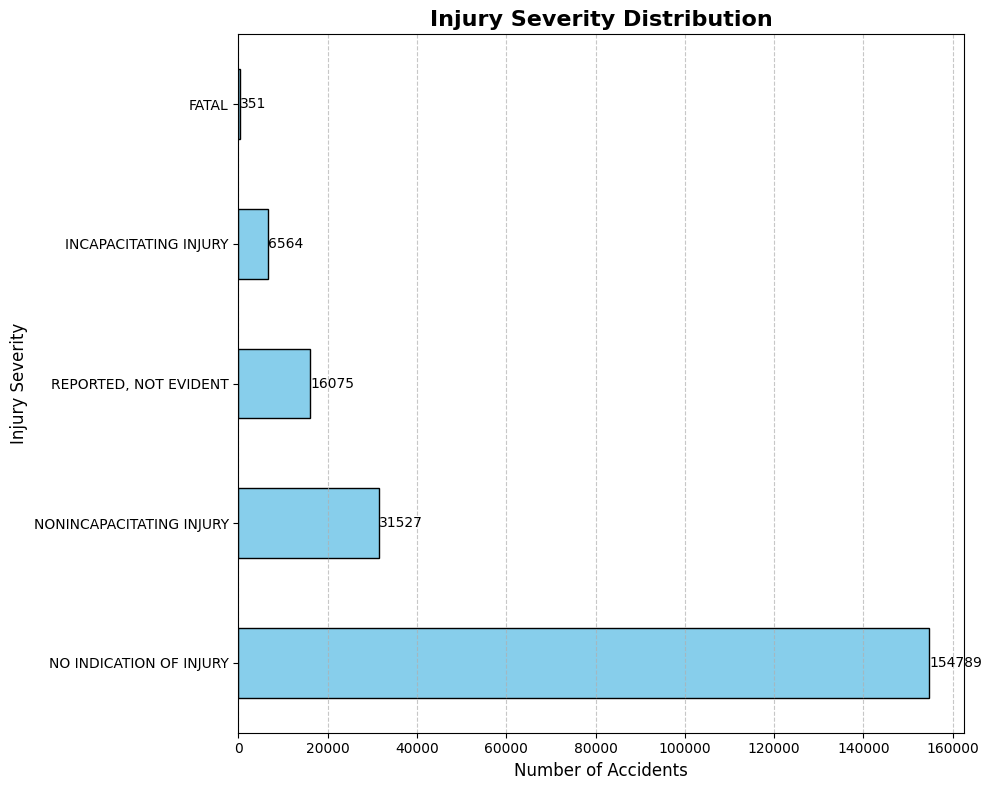

In [14]:
# Plotting the distribution of injury severity
plt.figure(figsize=(10, 8))
bars = severity_counts.plot(
    kind='barh',
    color='skyblue',
    edgecolor='black'
)

# agreed upon average number of accidents
for index, value in enumerate(severity_counts):
    plt.text(value + 5, index, str(value), va='center', fontsize=10)

# Add labels to the plot
plt.title('Injury Severity Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Injury Severity', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Shows the distribution of injury severity in accidents. 
# It allows you to see how many accidents result in different levels of injury severity.

In [15]:
# group by lighting condition and count the number of accidents
lighting_counts = df['lighting_condition'].value_counts()
lighting_counts

lighting_condition
DAYLIGHT                  134109
DARKNESS, LIGHTED ROAD     53378
DARKNESS                    7436
DUSK                        6323
UNKNOWN                     4336
DAWN                        3724
Name: count, dtype: int64

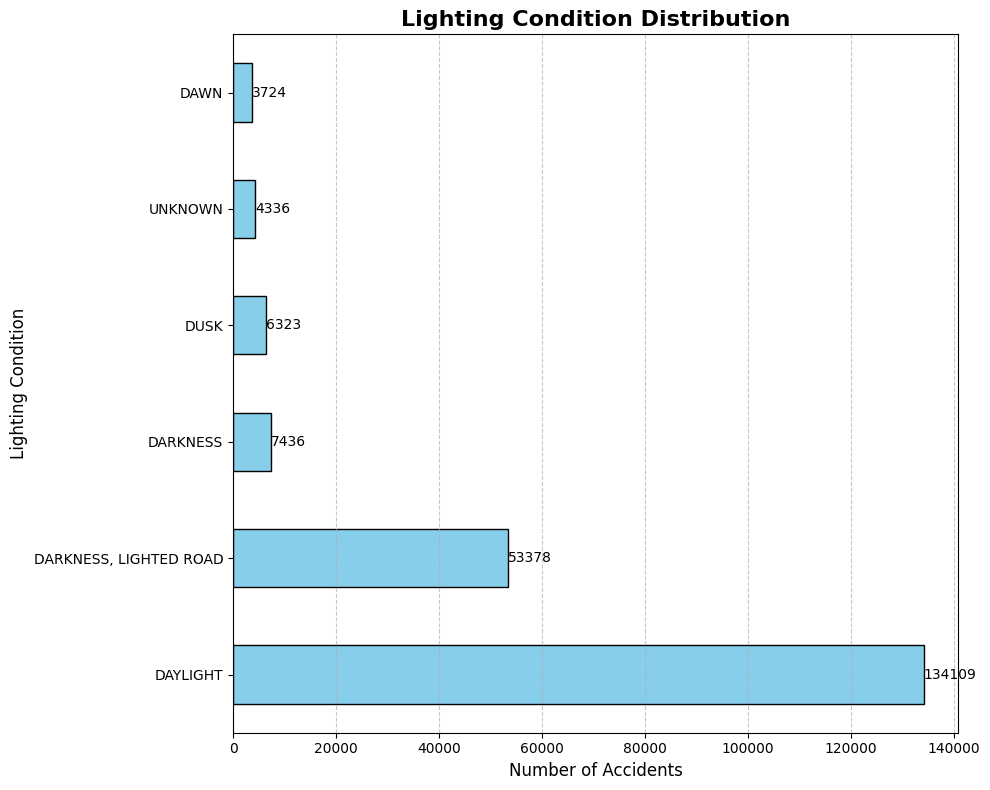

In [16]:
# Create the graph
plt.figure(figsize=(10, 8))
bars = lighting_counts.plot(
    kind='barh',
    color='skyblue',
    edgecolor='black'
)

# Add value annotations next to each bar
for index, value in enumerate(lighting_counts):
    plt.text(value + 5, index, str(value), va='center', fontsize=10)

# Improve titles and labels
plt.title('Lighting Condition Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Lighting Condition', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# It shows the distribution of accidents according to lighting conditions. 
# It allows to see how lighting conditions affect the occurrence of accidents.

In [17]:
# group by road surface condition and count the number of accidents
roadway_counts = df['roadway_surface_cond'].value_counts()

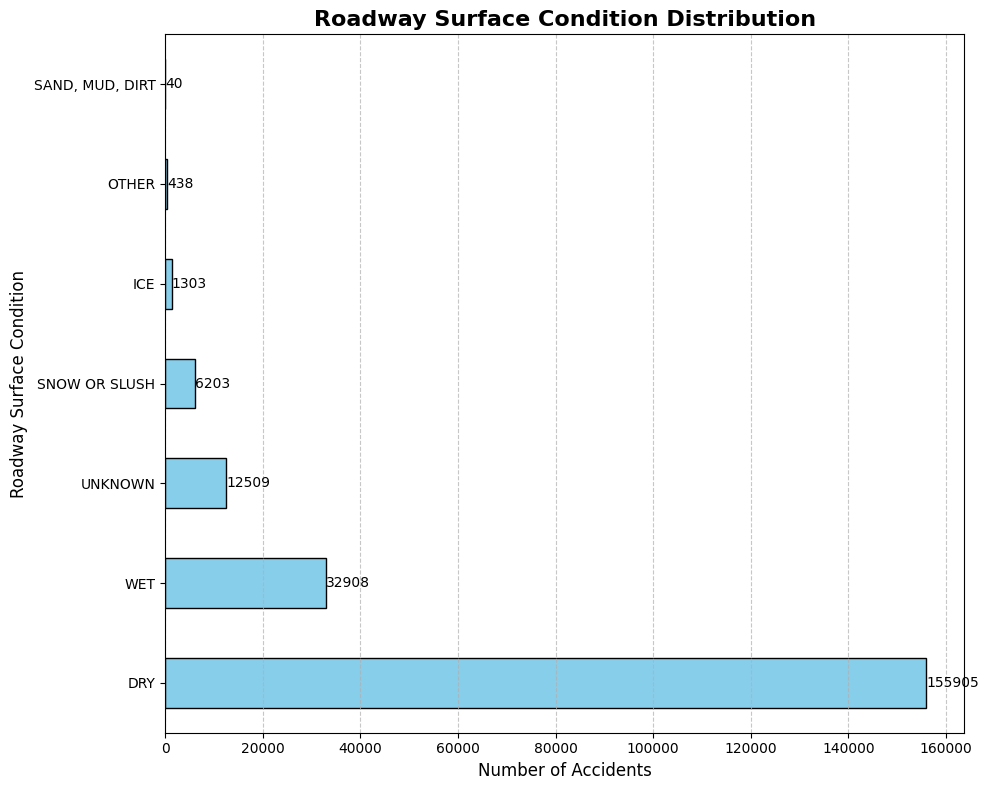

In [18]:
# Create the graph with a light blue color
plt.figure(figsize=(10, 8))
bars = roadway_counts.plot(
    kind='barh',
    color='skyblue',
    edgecolor='black'
)

# Add value annotations next to each bar
for index, value in enumerate(roadway_counts):
    plt.text(value + 5, index, str(value), va='center', fontsize=10)

# Improve titles and labels
plt.title('Roadway Surface Condition Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Roadway Surface Condition', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Shows the distribution of accidents according to road surface conditions. 
# It allows you to see how road conditions affect the occurrence of accidents.

In [19]:
# group by accident hour and count the number of accidents
accidents_by_hour = df['crash_hour'].value_counts().sort_index()
accidents_by_hour

crash_hour
0      4487
1      3729
2      3080
3      2364
4      2104
5      2819
6      4772
7      9405
8     11381
9      9300
10     8990
11    10052
12    11726
13    11949
14    13349
15    15894
16    16025
17    16097
18    13431
19     9683
20     8219
21     7472
22     7035
23     5943
Name: count, dtype: int64

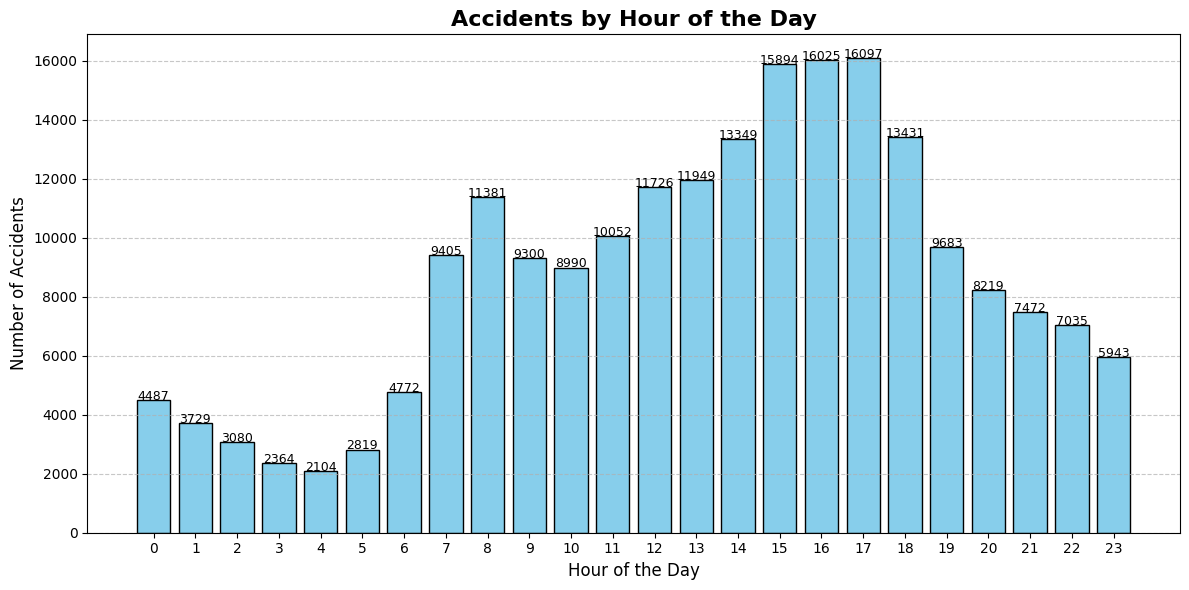

In [20]:
# Ensure 'crash_hour' is properly formatted and create counts
accidents_by_hour = df['crash_hour'].value_counts().sort_index()

# Create the graph
plt.figure(figsize=(12, 6))
plt.bar(accidents_by_hour.index, accidents_by_hour.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Accidents by Hour of the Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for index, value in enumerate(accidents_by_hour.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()

# Shows the number of accidents that occurred in each hour of the day. 
# It allows you to identify the hours of the day with the highest and lowest number of accidents.

In [21]:
# group by combined conditions and count the number of accidents
combined_conditions = df.groupby(['weather_condition', 'lighting_condition', 'roadway_surface_cond']).size()
combined_conditions = combined_conditions.sort_values(ascending=False).head(10)
combined_conditions


weather_condition  lighting_condition      roadway_surface_cond
CLEAR              DAYLIGHT                DRY                     101918
                   DARKNESS, LIGHTED ROAD  DRY                      36538
RAIN               DAYLIGHT                WET                      10925
                   DARKNESS, LIGHTED ROAD  WET                       7256
CLEAR              DARKNESS                DRY                       4704
                   DUSK                    DRY                       4205
CLOUDY/OVERCAST    DAYLIGHT                DRY                       3930
CLEAR              DAYLIGHT                WET                       3720
                                           UNKNOWN                   3508
UNKNOWN            UNKNOWN                 UNKNOWN                   3409
dtype: int64

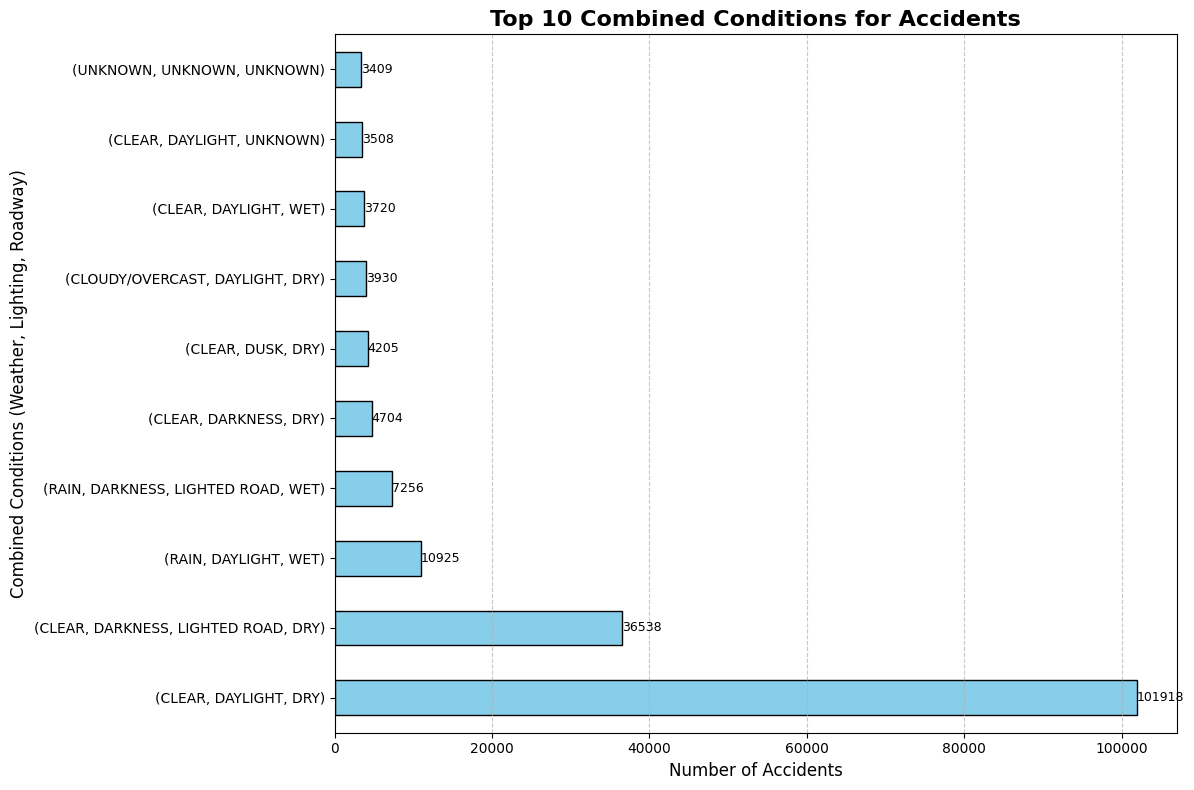

In [22]:
# Create the graph
plt.figure(figsize=(12, 8))
combined_conditions.plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Top 10 Combined Conditions for Accidents', fontsize=16, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Combined Conditions (Weather, Lighting, Roadway)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for index, value in enumerate(combined_conditions.values):
    plt.text(value + 5, index, str(value), va='center', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()

# Shows the 10 most common combinations of conditions (such as weather, lighting, and road surface) under which accidents occur. 
# Allows you to identify the most dangerous conditions.

In [23]:
# group by crash hour and day of week and count the number of accidents
accidents_heatmap = df.pivot_table(index='crash_day_of_week', columns='crash_hour', values='num_units', aggfunc='count')
accidents_heatmap

crash_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
crash_day_of_week,,,,,,,,,,,,,,,,,,,,,
1,1220,1184,1059,913,608,469,428,452,497,769,...,1583,1581,1483,1493,1419,1190,1093,1056,916,765
2,538,390,303,197,221,404,733,1579,1848,1330,...,1866,2273,2313,2274,1657,1186,958,840,722,532
3,367,249,166,130,167,365,807,1803,2126,1582,...,1898,2421,2541,2594,2067,1374,1068,897,795,581
4,393,270,187,164,187,401,837,1768,2172,1561,...,1908,2357,2443,2639,2085,1360,1055,973,797,640
5,461,260,216,154,199,382,754,1718,2075,1492,...,1875,2478,2610,2520,2102,1352,1201,1008,956,773
6,491,417,294,221,261,439,752,1513,1908,1510,...,2313,2737,2733,2694,2324,1698,1401,1347,1403,1184
7,1017,959,855,585,461,359,461,572,755,1056,...,1906,2047,1902,1883,1777,1523,1443,1351,1446,1468


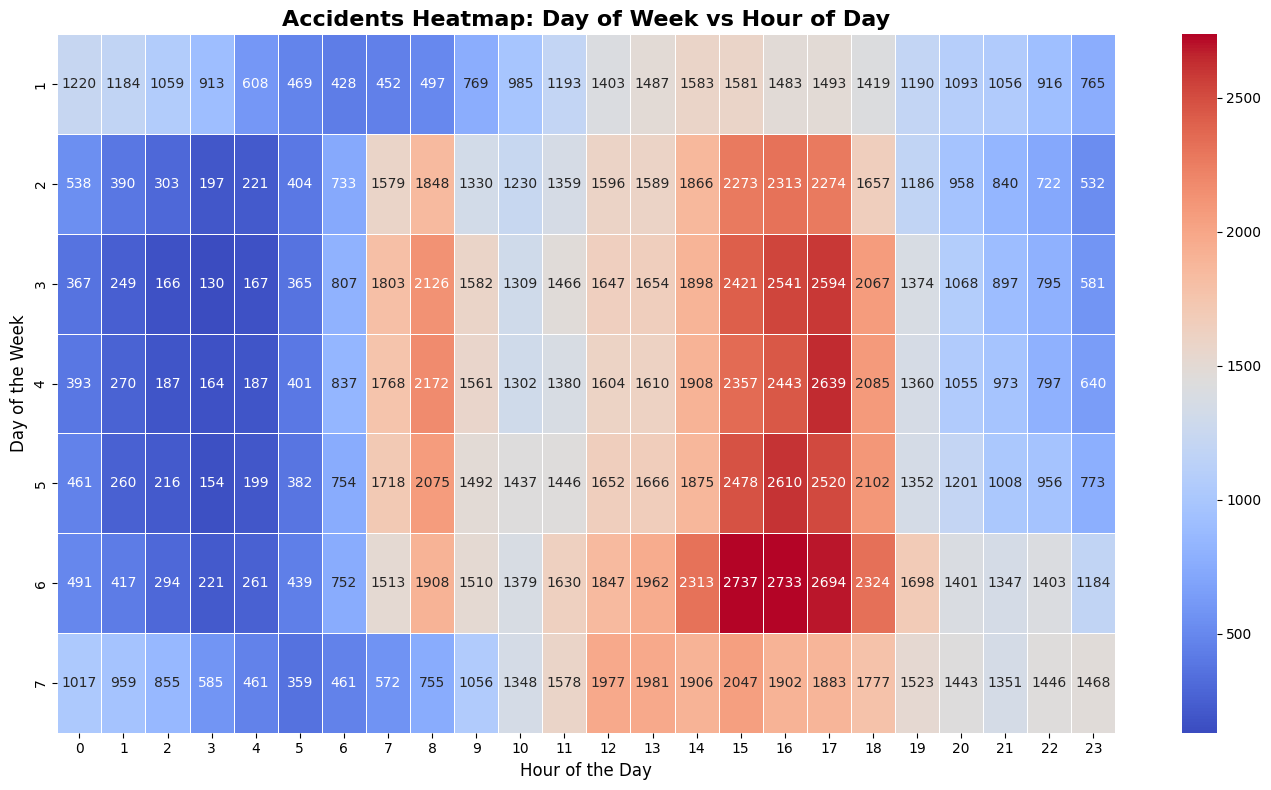

In [24]:
# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(accidents_heatmap, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5, cbar=True)

# Improve titles and labels
plt.title('Accidents Heatmap: Day of Week vs Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Displays a heat matrix that relates the days of the week to the times of day when accidents occur. 
# It allows identifying specific temporal patterns in the occurrence of accidents.

In [25]:
# group by crash type and average number of vehicles involved
crash_vehicle_relation = df.groupby('first_crash_type')['num_units'].mean()
crash_vehicle_relation

first_crash_type
ANGLE                           2.108670
ANIMAL                          1.311688
FIXED OBJECT                    1.104597
HEAD ON                         2.188268
OTHER NONCOLLISION              1.248996
OTHER OBJECT                    1.399209
OVERTURNED                      1.250000
PARKED MOTOR VEHICLE            2.270182
PEDALCYCLIST                    2.016489
PEDESTRIAN                      2.062472
REAR END                        2.112333
REAR TO FRONT                   2.040622
REAR TO REAR                    2.102041
REAR TO SIDE                    2.089263
SIDESWIPE OPPOSITE DIRECTION    2.152800
SIDESWIPE SAME DIRECTION        2.057864
TRAIN                           1.750000
TURNING                         2.062222
Name: num_units, dtype: float64

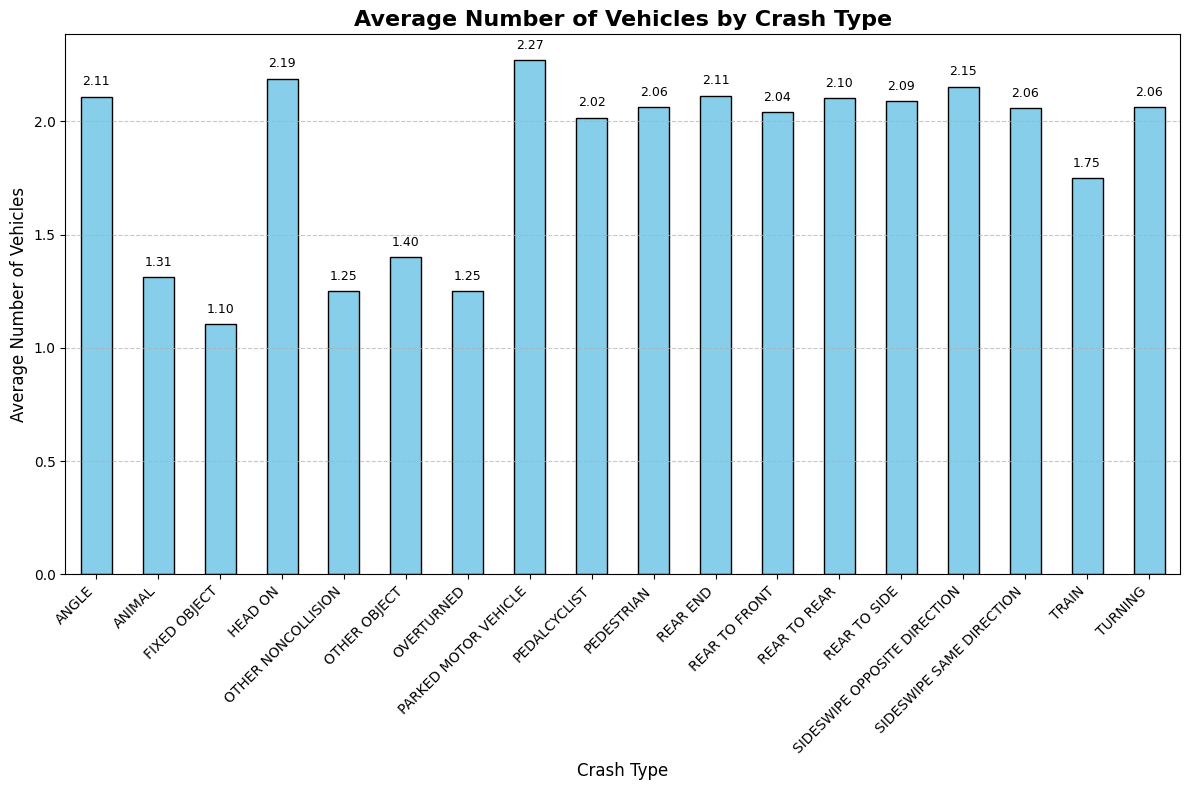

In [26]:
# Create a vertical bar chart to visualize this relationship
plt.figure(figsize=(12, 8))
crash_vehicle_relation.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

# Add labels and title
plt.title('Average Number of Vehicles by Crash Type', fontsize=16, fontweight='bold')
plt.xlabel('Crash Type', fontsize=12)
plt.ylabel('Average Number of Vehicles', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

# Annotate each bar with its value
for index, value in enumerate(crash_vehicle_relation.values):
    plt.text(index, value + 0.05, f"{value:.2f}", ha='center', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()

# It shows the average number of vehicles involved in each type of accident. 
# It allows to see what types of accidents more vehicles tend to involve.

In [27]:
# group by crash type and average number of injuries
injuries_by_hour = df.groupby(['crash_hour', 'most_severe_injury']).size().unstack()
injuries_by_hour


most_severe_injury,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
crash_hour,,,,,
0,10,190,3017,913,357
1,23,173,2525,718,290
2,21,151,2073,611,224
3,13,111,1590,481,169
4,12,99,1444,406,143
5,14,115,1971,509,210
6,4,200,3397,790,381
7,7,274,7000,1367,757
8,8,338,8541,1630,864


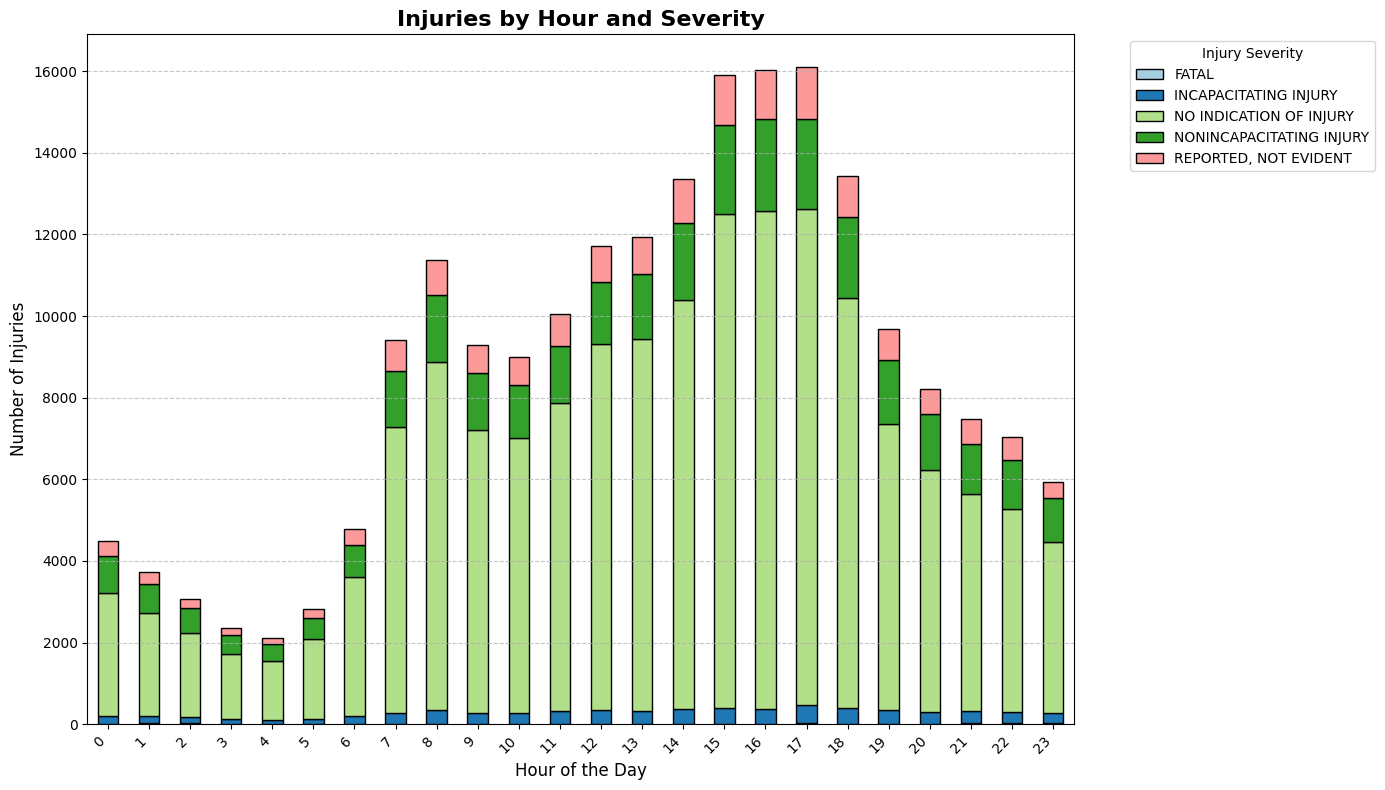

In [28]:
# Plot a stacked bar chart for injuries by hour
injuries_by_hour.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=plt.cm.Paired.colors,
    edgecolor='black'
)

# Add labels and title
plt.title('Injuries by Hour and Severity', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Injuries', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# It shows the amount of injuries per day of the day and its severity. 
# It allows identifying the hours of the day with more injuries and their severity.